<a href="https://colab.research.google.com/github/anafaradis/Coursera1/blob/main/sabar_ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://drive.google.com/drive/folders/1PyoiXRTZST5TRatJ30zx__rXVaaK44cC?usp=sharing"
data_dir = tf.keras.utils.get_file('/content/drive/MyDrive/Colab Notebooks/images', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

   8192/Unknown - 0s 0us/step

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1246


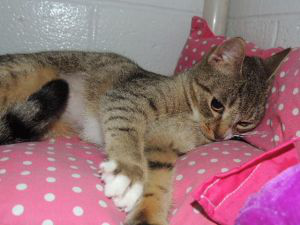

In [ ]:
abyssinian = list(data_dir.glob('Abyssinian/*'))
PIL.Image.open(str(abyssinian[0]))

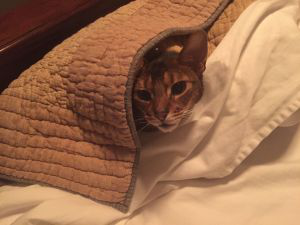

In [ ]:
PIL.Image.open(str(abyssinian[1]))

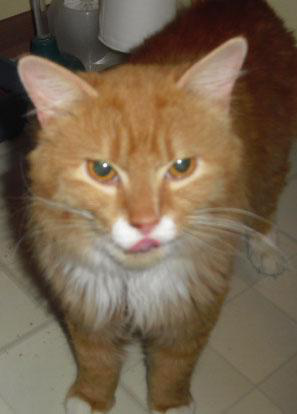

In [ ]:
americanbobtail = list(data_dir.glob('American Bobtail/*'))
PIL.Image.open(str(americanbobtail[0]))

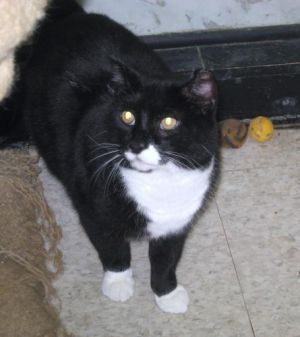

In [ ]:
PIL.Image.open(str(americanbobtail[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1246 files belonging to 2 classes.
Using 997 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1246 files belonging to 2 classes.
Using 249 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Abyssinian', 'American Bobtail']


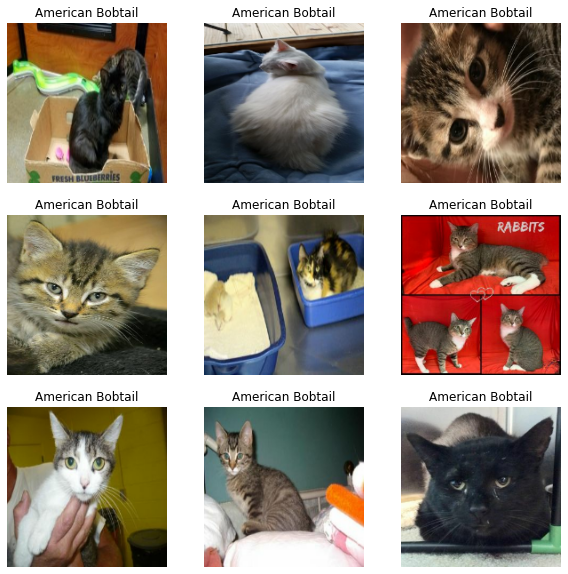

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 [==============================] - 66s 2s/step - loss: 0.6128 - accuracy: 0.7583 - val_loss: 0.4820 - val_accuracy: 0.8153
Epoch 2/10
32/32 [==============================] - 30s 952ms/step - loss: 0.4555 - accuracy: 0.8034 - val_loss: 0.5114 - val_accuracy: 0.7992
Epoch 3/10
32/32 [==============================] - 31s 981ms/step - loss: 0.3766 - accuracy: 0.8435 - val_loss: 0.4849 - val_accuracy: 0.8153
Epoch 4/10
32/32 [==============================] - 31s 965ms/step - loss: 0.2898 - accuracy: 0.8796 - val_loss: 0.5645 - val_accuracy: 0.7751
Epoch 5/10
32/32 [==============================] - 31s 972ms/step - loss: 0.1992 - accuracy: 0.9218 - val_loss: 0.6115 - val_accuracy: 0.8193
Epoch 6/10
32/32 [==============================] - 31s 982ms/step - loss: 0.1586 - accuracy: 0.9358 - val_loss: 0.6459 - val_accuracy: 0.8112
Epoch 7/10
32/32 [==============================] - 31s 956ms/step - loss: 0.1008 - accuracy: 0.9669 - val_loss: 0.7831 - val_accuracy: 0.7671
Ep

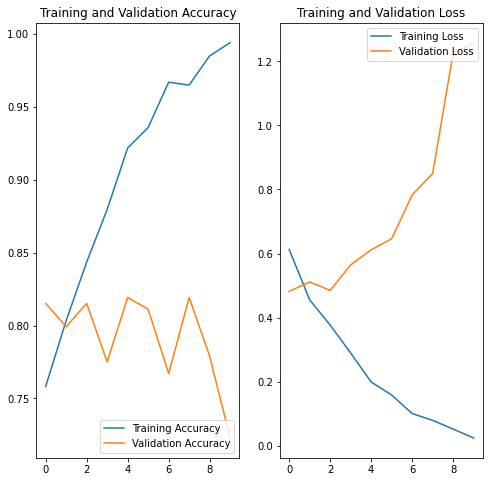

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

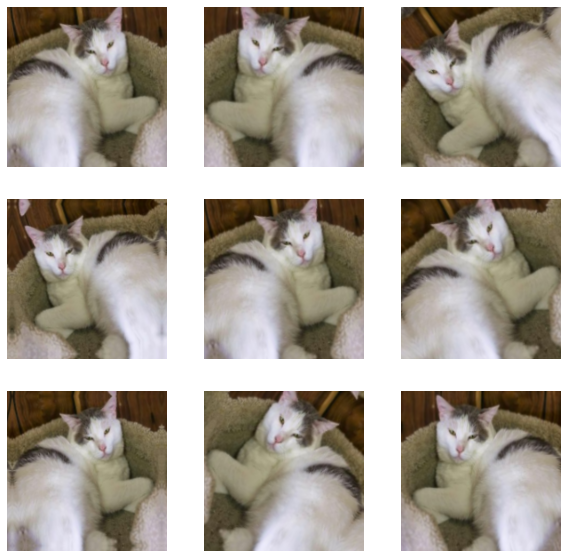

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
32/32 [==============================] - 37s 1s/step - loss: 0.5771 - accuracy: 0.7563 - val_loss: 0.4628 - val_accuracy: 0.8153
Epoch 2/15
32/32 [==============================] - 36s 1s/step - loss: 0.4971 - accuracy: 0.7914 - val_loss: 0.5121 - val_accuracy: 0.8112
Epoch 3/15
32/32 [==============================] - 36s 1s/step - loss: 0.4959 - accuracy: 0.7934 - val_loss: 0.4574 - val_accuracy: 0.8072
Epoch 4/15
32/32 [==============================] - 36s 1s/step - loss: 0.4768 - accuracy: 0.7803 - val_loss: 0.4542 - val_accuracy: 0.8153
Epoch 5/15
32/32 [==============================] - 36s 1s/step - loss: 0.4688 - accuracy: 0.7914 - val_loss: 0.4511 - val_accuracy: 0.8153
Epoch 6/15
32/32 [==============================] - 36s 1s/step - loss: 0.4628 - accuracy: 0.7864 - val_loss: 0.4551 - val_accuracy: 0.8032
Epoch 7/15
32/32 [==============================] - 36s 1s/step - loss: 0.4669 - accuracy: 0.8004 - val_loss: 0.4612 - val_accuracy: 0.8112
Epoch 8/15
32/32 [==

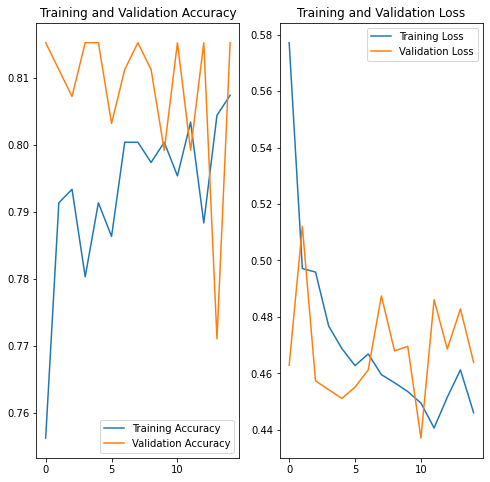

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()